After thourough analysis of multiple research papers these methods were choosen to be tested:
1. prediction of fraud take place through learnt patterns: Traditional Decision trees, lgbm, Random Forest
2. using one_class classification or not learning the patterns of fraud

In [1]:
import pandas as pd

df1=pd.read_csv('/kaggle/input/copy-of-credit-fraud-data-kaggle-competition/creditcard.csv')

In [2]:
# Define the target variable column name
target_column = 'Class'  # Replace with your actual target column name

# Filter rows where the target variable is 1
df_target_1 = df1[df1[target_column] == 1]

# Count missing values in each column for these rows
missing_counts = df_target_1.isnull().sum()

# Display missing value count for columns in rows where target is 1
print(missing_counts)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [3]:
# Define the target variable column name
target_column = 'Class'  # Replace with your actual target column name

# Filter rows where the target variable is 1
df_target_1 = df1[df1[target_column] == 0]

# Count missing values in each column for these rows
missing_counts = df_target_1.isnull().sum()

# Display missing value count for columns in rows where target is 1
print(missing_counts)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [4]:
# Count the number of rows where the target variable is 1
count_target_1 = (df1[target_column] == 1).sum()

# Print the count
print("Number of rows where target == 1:", count_target_1)


Number of rows where target == 1: 492


In [5]:
df1.shape

(284807, 31)

#### this is for the another dataset
#### /kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv

Fraud percentage in dataset: 0.1727%


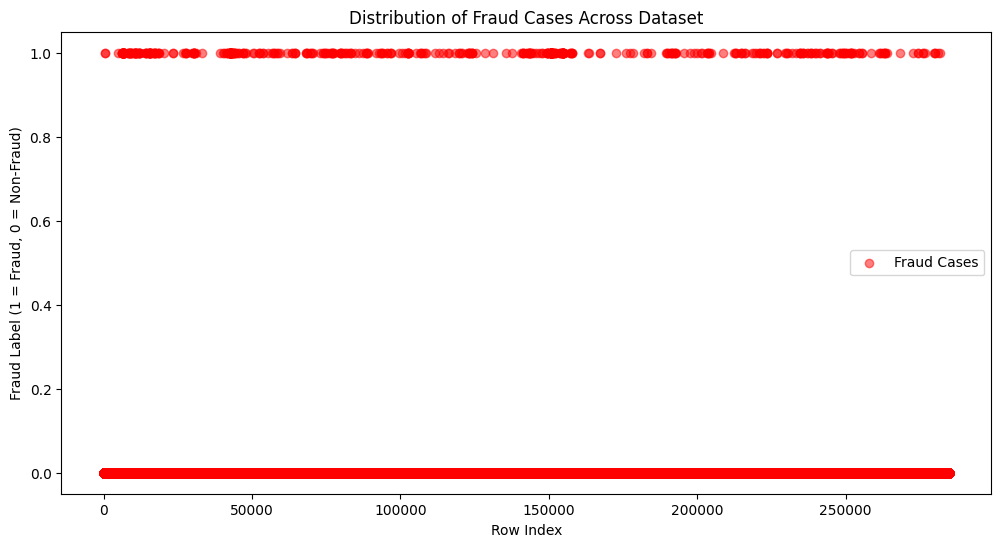

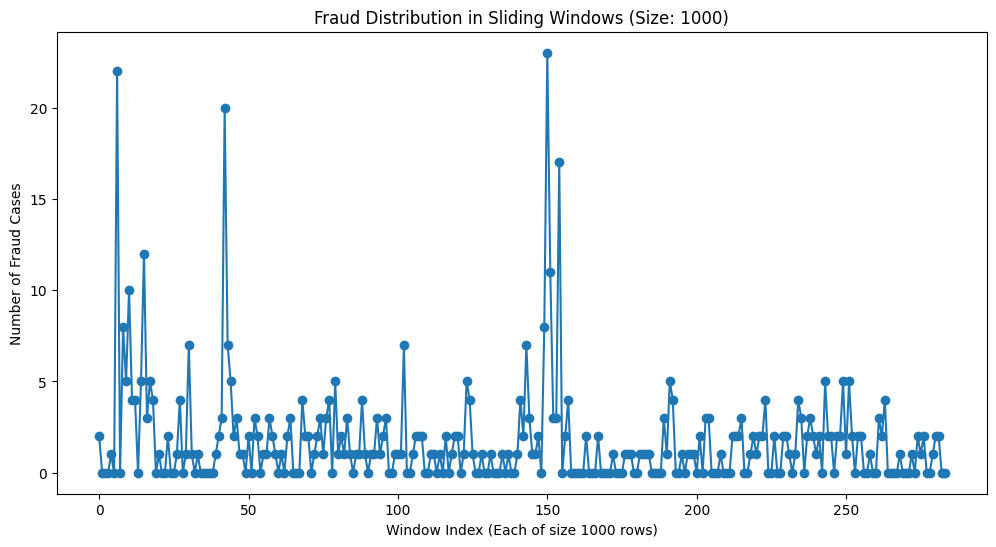

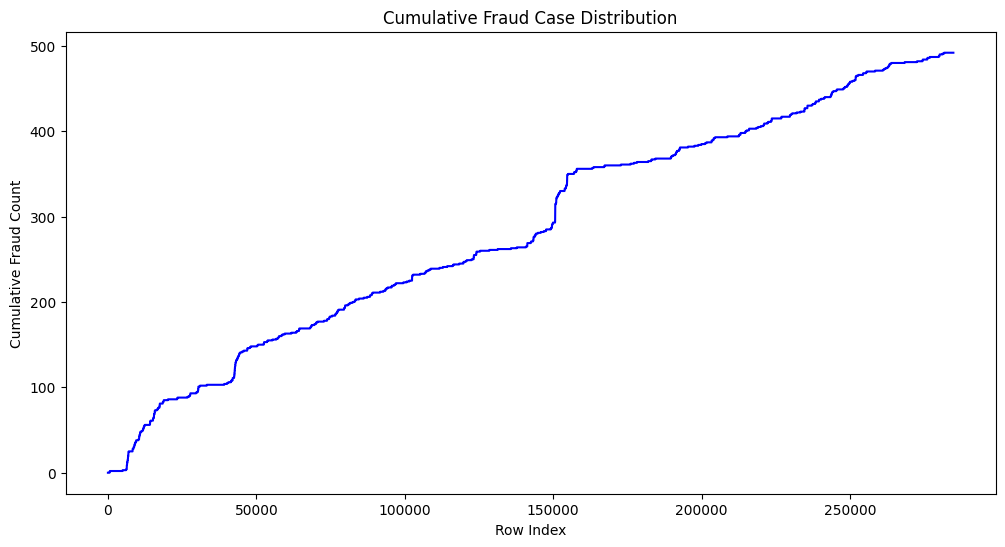

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fraud_column = 'Class'  # Change this to your actual fraud indicator column

# Check the proportion of fraud cases
fraud_percentage = df1[fraud_column].mean() * 100
print(f"Fraud percentage in dataset: {fraud_percentage:.4f}%")

# Plot fraud case distribution along dataset index
plt.figure(figsize=(12, 6))
plt.scatter(df1.index, df1[fraud_column], color='red', alpha=0.5, label='Fraud Cases')
plt.xlabel("Row Index")
plt.ylabel("Fraud Label (1 = Fraud, 0 = Non-Fraud)")
plt.title("Distribution of Fraud Cases Across Dataset")
plt.legend()
plt.show()

# Sliding window check (e.g., every 1000 rows)
window_size = 1000
num_windows = len(df1) // window_size
fraud_counts = [
    df1.iloc[i * window_size:(i + 1) * window_size][fraud_column].sum()
    for i in range(num_windows)
]

plt.figure(figsize=(12, 6))
plt.plot(range(num_windows), fraud_counts, marker='o', linestyle='-')
plt.xlabel("Window Index (Each of size 1000 rows)")
plt.ylabel("Number of Fraud Cases")
plt.title(f"Fraud Distribution in Sliding Windows (Size: {window_size})")
plt.show()

# Cumulative sum plot of fraud cases
cumulative_fraud = np.cumsum(df1[fraud_column])
plt.figure(figsize=(12, 6))
plt.plot(df1.index, cumulative_fraud, color='blue')
plt.xlabel("Row Index")
plt.ylabel("Cumulative Fraud Count")
plt.title("Cumulative Fraud Case Distribution")
plt.show()

In [7]:
df1.shape

(284807, 31)

In [8]:
df_cleaned = df1.drop_duplicates()
df_cleaned.shape

(283726, 31)

### Decision tree 1: without considering class imbalance,no need for feature selection(as we have just 30 features) , feature engineering

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report


# Assume the last column is the target (fraudulent or not)
X = df_cleaned.iloc[:, :-1]  # All columns except last one (features)
y = df_cleaned.iloc[:, -1]   # Last column (target label)

# Splitting dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Decision Tree model with parameters from the paper
clf = DecisionTreeClassifier(
    criterion="gini",  # Gini impurity for splitting
    max_depth=None,  # No depth limit (to allow maximum learning)
    min_samples_split=2,  # Minimum samples needed to split a node
    min_samples_leaf=1,  # Minimum samples needed in a leaf node
    random_state=42  # Ensuring reproducibility
)

# Train the Decision Tree classifier
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print("📊 Decision Tree Performance Metrics 📊")
print(f"✅ Accuracy: {accuracy * 100:.2f}%")
print(f"🎯 Precision: {precision * 100:.2f}%")
print(f"📌 Recall: {recall * 100:.2f}%")
print(f"⚡ F1-Score: {f1 * 100:.2f}%")
print("\n🔍 Detailed Classification Report:\n", classification_report(y_test, y_pred))


📊 Decision Tree Performance Metrics 📊
✅ Accuracy: 99.90%
🎯 Precision: 66.67%
📌 Recall: 71.11%
⚡ F1-Score: 68.82%

🔍 Detailed Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.67      0.71      0.69        90

    accuracy                           1.00     56746
   macro avg       0.83      0.86      0.84     56746
weighted avg       1.00      1.00      1.00     56746



Decision Tree 2 : Using oversampling of Fraud rows while keeping the same set of fraud data for the test set.

In [10]:
# Assume the last column is the target (fraudulent or not)
X = df_cleaned.iloc[:, :-1]  # All columns except last one (features)
y = df_cleaned.iloc[:, -1]   # Last column (target label)

In [11]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

def custom_oversampling_with_holdout(X, y, test_size=0.2, fraud_ratio=0.5):
    """
    Splits the dataset into training and testing sets, then applies SMOTE only to the training set
    while keeping the majority class unchanged and increasing the minority class.

    Parameters:
    - X: Feature set
    - y: Target labels
    - test_size: Percentage of data to be kept as the real-world test set (default 20%)
    - fraud_ratio: Desired proportion of fraud cases in the training set after oversampling

    Returns:
    - X_train_resampled, y_train_resampled: Oversampled training set
    - X_test, y_test: Unmodified real-world test set
    """

    # Step 1: Split data into training (80%) and holdout test set (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # Step 2: Count class distribution in training set
    class_counts = y_train.value_counts().to_dict()
    majority_class = max(class_counts, key=class_counts.get)  # Class with more samples (0 in fraud cases)
    minority_class = min(class_counts, key=class_counts.get)  # Class with fewer samples (1 in fraud cases)

    # Step 3: Determine the number of minority samples needed to achieve the desired fraud ratio
    total_majority = class_counts[majority_class]  # Keep this unchanged
    total_minority = int((fraud_ratio / (1 - fraud_ratio)) * total_majority)  # Increase fraud cases only

    # Step 4: Apply SMOTE only to the minority class (increase fraud cases)
    smote = SMOTE(sampling_strategy={minority_class: total_minority}, random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Print class distributions
    print("🔹 Before SMOTE (Train Set):", dict(class_counts))
    print("✅ After SMOTE (Train Set):", dict(pd.Series(y_train_resampled).value_counts()))
    print("🔍 Test Set (Real Data) Distribution:", dict(pd.Series(y_test).value_counts()))

    return X_train_resampled, y_train_resampled, X_test, y_test

# Example usage: Hold out 20% test set and apply SMOTE only to training set (increase fraud cases)
X_train_resampled, y_train_resampled, X_test, y_test = custom_oversampling_with_holdout(X, y, test_size=0.2, fraud_ratio=0.5)



🔹 Before SMOTE (Train Set): {0: 226602, 1: 378}
✅ After SMOTE (Train Set): {0: 226602, 1: 226602}
🔍 Test Set (Real Data) Distribution: {0: 56651, 1: 95}


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

def oversample_minority_by_replication(X, y, test_size=0.2, oversample_ratio=0.5):

    # Step 1: Split data into training (80%) and holdout test set (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # Step 2: Convert training data back into a dataframe
    train_df = X_train.copy()
    train_df['target'] = y_train  # Append the target column back for processing

    # Step 3: Separate majority and minority class
    df_majority = train_df[train_df['target'] == 0]  # Majority class (target = 0)
    df_minority = train_df[train_df['target'] == 1]  # Minority class (target = 1)

    # Step 4: Calculate the number of samples needed for the minority class
    target_minority_count = int(len(df_majority) * oversample_ratio)
    num_samples_to_add = target_minority_count - len(df_minority)

    # Step 5: Oversample the minority class by simple replication
    if num_samples_to_add > 0:
        df_minority_oversampled = df_minority.sample(n=num_samples_to_add, replace=True, random_state=42)  # Replicate rows
        df_train_resampled = pd.concat([df_majority, df_minority, df_minority_oversampled], ignore_index=True)
    else:
        df_train_resampled = pd.concat([df_majority, df_minority], ignore_index=True)  # No oversampling needed

    # Step 6: Separate features and target for training
    X_train_resampled = df_train_resampled.drop(columns=['target'])
    y_train_resampled = df_train_resampled['target']

    # Print class distributions
    print("🔹 Before Oversampling (Train Set):", dict(y_train.value_counts()))
    print("✅ After Oversampling (Train Set):", dict(y_train_resampled.value_counts()))
    print("🔍 Test Set (Real Data) Distribution:", dict(y_test.value_counts()))

    return X_train_resampled, y_train_resampled, X_test, y_test

# Example usage: Perform 80:20 split and oversample minority class in training set to 50% of majority class
X_train_resampled, y_train_resampled, X_test, y_test = oversample_minority_by_replication(X, y, test_size=0.2, oversample_ratio=2.5)


🔹 Before Oversampling (Train Set): {0: 226602, 1: 378}
✅ After Oversampling (Train Set): {1: 566505, 0: 226602}
🔍 Test Set (Real Data) Distribution: {0: 56651, 1: 95}


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report


# Define Decision Tree model with parameters from the paper
clf = DecisionTreeClassifier(
    criterion="gini",  # Gini impurity for splitting
    max_depth=None,  # No depth limit (to allow maximum learning)
    min_samples_split=2,  # Minimum samples needed to split a node
    min_samples_leaf=1,  # Minimum samples needed in a leaf node
    random_state=42  # Ensuring reproducibility
)

# Train the Decision Tree classifier
clf.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print("📊 Decision Tree Performance Metrics 📊")
print(f"✅ Accuracy: {accuracy * 100:.2f}%")
print(f"🎯 Precision: {precision * 100:.2f}%")
print(f"📌 Recall: {recall * 100:.2f}%")
print(f"⚡ F1-Score: {f1 * 100:.2f}%")
print("\n🔍 Detailed Classification Report:\n", classification_report(y_test, y_pred))


📊 Decision Tree Performance Metrics 📊
✅ Accuracy: 99.92%
🎯 Precision: 81.25%
📌 Recall: 68.42%
⚡ F1-Score: 74.29%

🔍 Detailed Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.81      0.68      0.74        95

    accuracy                           1.00     56746
   macro avg       0.91      0.84      0.87     56746
weighted avg       1.00      1.00      1.00     56746



In [15]:
📊 Decision Tree Performance Metrics 📊
✅ Accuracy: 99.92%
🎯 Precision: 81.25%
📌 Recall: 68.42%
⚡ F1-Score: 74.29%

🔍 Detailed Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.81      0.68      0.74        95

    accuracy                           1.00     56746
   macro avg       0.91      0.84      0.87     56746
weighted avg       1.00      1.00      1.00     56746


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 10)

Decision Tree 3: along with above oversampling technique we apply a simple feature selection before training

In [16]:
import numpy as np
from imblearn.over_sampling import SMOTE

# Fix the random state for consistent splits
RANDOM_SEED = 42

smote = SMOTE(random_state=RANDOM_SEED)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_resampled, y_train_resampled)

temp_clf = DecisionTreeClassifier(random_state=42)
temp_clf.fit(X_train_resampled, y_train_resampled)

# Get feature importances
feature_importances = temp_clf.feature_importances_
feature_names = np.array(X_train_resampled.columns)

# Step 4: Identify the two least important features (sort deterministically)
least_important_features = feature_names[np.argsort(feature_importances)[:1]]

print("📉 Removing Least Important Features:", least_important_features)

# Step 5: Drop these features from both train and test sets
X_train_resampled = X_train_resampled.drop(columns=least_important_features)
X_test = X_test.drop(columns=least_important_features)

# Step 6: Train the Final Decision Tree Model
clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=RANDOM_SEED
)

clf.fit(X_train_resampled, y_train_resampled)

# Step 7: Predict on test set
y_pred = clf.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print("📊 Decision Tree Performance Metrics 📊")
print(f"✅ Accuracy: {accuracy * 100:.2f}%")
print(f"🎯 Precision: {precision * 100:.2f}%")
print(f"📌 Recall: {recall * 100:.2f}%")
print(f"⚡ F1-Score: {f1 * 100:.2f}%")
print("\n🔍 Detailed Classification Report:\n", classification_report(y_test, y_pred))

📉 Removing Least Important Features: ['V23']
📊 Decision Tree Performance Metrics 📊
✅ Accuracy: 99.90%
🎯 Precision: 78.57%
📌 Recall: 57.89%
⚡ F1-Score: 66.67%

🔍 Detailed Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.79      0.58      0.67        95

    accuracy                           1.00     56746
   macro avg       0.89      0.79      0.83     56746
weighted avg       1.00      1.00      1.00     56746



> we can see that approach 2 for decision tree gave us better results

In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame if needed
import pandas as pd
X_train_resampled = pd.DataFrame(X_train_scaled, columns=X_train_resampled.columns, index=X_train_resampled.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [18]:
X_test.shape

(56746, 29)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report


# Define Decision Tree model with parameters from the paper
clf = DecisionTreeClassifier(
    criterion="gini",  # Gini impurity for splitting
    max_depth=None,  # No depth limit (to allow maximum learning)
    min_samples_split=2,  # Minimum samples needed to split a node
    min_samples_leaf=1,  # Minimum samples needed in a leaf node
    random_state=42  # Ensuring reproducibility
)

# Train the Decision Tree classifier
clf.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print("📊 Decision Tree Performance Metrics 📊")
print(f"✅ Accuracy: {accuracy * 100:.2f}%")
print(f"🎯 Precision: {precision * 100:.2f}%")
print(f"📌 Recall: {recall * 100:.2f}%")
print(f"⚡ F1-Score: {f1 * 100:.2f}%")
print("\n🔍 Detailed Classification Report:\n", classification_report(y_test, y_pred))


📊 Decision Tree Performance Metrics 📊
✅ Accuracy: 99.90%
🎯 Precision: 78.57%
📌 Recall: 57.89%
⚡ F1-Score: 66.67%

🔍 Detailed Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.79      0.58      0.67        95

    accuracy                           1.00     56746
   macro avg       0.89      0.79      0.83     56746
weighted avg       1.00      1.00      1.00     56746



In [20]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Apply SMOTE with reduced oversampling strategy (0.2 instead of 0.3)
smote = SMOTE(sampling_strategy=0.2, random_state=42)  # Reduce fraud sample percentage
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# LightGBM best settings with adjustments for better precision-recall balance
lgb_params = {
    "objective": "binary",
    "boosting_type": "gbdt",
    "metric": ["auc", "binary_logloss"],
    "num_leaves": 40,             # Reduced from 50 to prevent excessive splits
    "max_depth": 10,              # Keep depth limited
    "learning_rate": 0.05,        # Optimal balance of speed & accuracy
    "feature_fraction": 0.7,      # Prevents overfitting
    "bagging_fraction": 0.7,      # Helps generalization
    "bagging_freq": 5,           # Frequency of bagging
    "lambda_l1": 0.3,            # Increase regularization to prevent overfitting
    "lambda_l2": 0.3,            # Increase regularization to prevent overfitting
    "min_child_samples": 20,      # Minimum number of samples per leaf
    "num_iterations": 1000,       # Early stopping will determine best iteration
    "scale_pos_weight": 2.0,      # Reduce from calculated value to avoid too many false positives
    "verbosity": -1               # Suppress output
}

# Train and Validation Data Preparation
train_data = lgb.Dataset(X_train_resampled, label=y_train_resampled)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Train the model with early stopping and logging
model = lgb.train(
    params=lgb_params,
    train_set=train_data,
    valid_sets=[valid_data],
    callbacks=[lgb.early_stopping(50), lgb.log_evaluation(10)]
)

# Predict probabilities
y_pred_prob = model.predict(X_test)

# **Adjust threshold to balance precision-recall tradeoff**
threshold = 0.7  # Increased from 0.5 to reduce false positives
y_pred = (y_pred_prob > threshold).astype(int)

# Performance Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


ValueError: Length of feature_name(29) and num_feature(30) don't match

In [ ]:
# import lightgbm as lgb
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# from imblearn.over_sampling import SMOTE  # Import SMOTE

# # **Apply StandardScaler BEFORE SMOTE**
# scaler_standard = StandardScaler()

# # Scale entire dataset before SMOTE
# X_train_scaled = pd.DataFrame(scaler_standard.fit_transform(X_train), columns=X_train.columns)
# X_test_scaled = pd.DataFrame(scaler_standard.transform(X_test), columns=X_test.columns)

# # **Apply SMOTE on scaled data**
# smote = SMOTE(sampling_strategy=0.2, random_state=42)  
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# # **Normalize 'Amount' using MinMaxScaler AFTER SMOTE**
# scaler_minmax = MinMaxScaler()

# if 'Amount' in X_train_resampled.columns and 'Amount' in X_test_scaled.columns:
#     X_train_resampled['Amount'] = scaler_minmax.fit_transform(X_train_resampled[['Amount']])
#     X_test_scaled['Amount'] = scaler_minmax.transform(X_test_scaled[['Amount']])

# # LightGBM best settings with adjustments for better precision-recall balance
# lgb_params = {
#     "objective": "binary",
#     "boosting_type": "gbdt",
#     "metric": ["auc", "binary_logloss"],
#     "num_leaves": 200,             
#     "max_depth": 7,              
#     "learning_rate": 0.05,        
#     "feature_fraction": 0.9,      
#     "bagging_fraction": 0.90,      
#     "bagging_freq": 6,           
#     "lambda_l1": 0.15,            
#     "lambda_l2": 0.15,            
#     "min_child_samples": 25,      
#     "num_iterations": 1000,       
#     "scale_pos_weight": 2.0,      
#     "verbosity": -1               
# }

# # Train and Validation Data Preparation
# train_data = lgb.Dataset(X_train_resampled, label=y_train_resampled)
# valid_data = lgb.Dataset(X_test_scaled, label=y_test, reference=train_data)

# # Train the model with early stopping and logging
# model = lgb.train(
#     params=lgb_params,
#     train_set=train_data,
#     valid_sets=[valid_data],
#     callbacks=[lgb.early_stopping(100), lgb.log_evaluation(10)]
# )

# # Predict probabilities
# y_pred_prob = model.predict(X_test_scaled)

# # **Adjust threshold to balance precision-recall tradeoff**
# threshold = 0.5  
# y_pred = (y_pred_prob > threshold).astype(int)

# # Performance Metrics
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred))
# print("Recall:", recall_score(y_test, y_pred))
# print("F1-score:", f1_score(y_test, y_pred))
# print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))


In [21]:
X_test.shape

(56746, 29)

Below code is to replicate the flow of action taken for the following test/////////////remember the model worked fine with either SMOTE or simple replication

In [22]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

def preprocess_for_lightgbm(df_cleaned, test_size=0.2, fraud_ratio=0.5):
    """
    Performs necessary preprocessing before running LightGBM.
    - Splits dataset into train-test
    - Applies SMOTE only to the training set
    - Ensures the test set remains untouched
    - Maintains the same fraud ratio as before

    Returns:
    - X_train_resampled, y_train_resampled: Oversampled training set
    - X_test, y_test: Unmodified real-world test set
    """

    # **1️⃣ Feature & Target Separation**
    X = df_cleaned.iloc[:, :-1]  # All columns except last one (features)
    y = df_cleaned.iloc[:, -1]   # Last column (target label)

    # **2️⃣ Train-Test Split (Keep Real-World Test Set)**
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # **3️⃣ Determine Class Distribution in Training Set**
    class_counts = y_train.value_counts().to_dict()
    majority_class = max(class_counts, key=class_counts.get)  # Class with more samples (usually 0 for fraud detection)
    minority_class = min(class_counts, key=class_counts.get)  # Class with fewer samples (usually 1 for fraud detection)

    # **4️⃣ Calculate New Minority Class Size for Desired Fraud Ratio**
    total_majority = class_counts[majority_class]  # Keep this unchanged
    total_minority = int((fraud_ratio / (1 - fraud_ratio)) * total_majority)  # Increase fraud cases to desired level

    # **5️⃣ Apply SMOTE Only to Minority Class**
    smote = SMOTE(sampling_strategy={minority_class: total_minority}, random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # **6️⃣ Print Class Distribution**
    print("🔹 Before SMOTE (Train Set):", dict(class_counts))
    print("✅ After SMOTE (Train Set):", dict(pd.Series(y_train_resampled).value_counts()))
    print("🔍 Test Set (Real Data) Distribution:", dict(pd.Series(y_test).value_counts()))

    return X_train_resampled, y_train_resampled, X_test, y_test

# **Run the preprocessing function before LightGBM**
X_train_resampled, y_train_resampled, X_test, y_test = preprocess_for_lightgbm(df_cleaned, test_size=0.2, fraud_ratio=0.5)


🔹 Before SMOTE (Train Set): {0: 226602, 1: 378}
✅ After SMOTE (Train Set): {0: 226602, 1: 226602}
🔍 Test Set (Real Data) Distribution: {0: 56651, 1: 95}


In [23]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Apply SMOTE with reduced oversampling strategy (0.2 instead of 0.3)
smote = SMOTE(sampling_strategy=0.2, random_state=42)  # Reduce fraud sample percentage
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# LightGBM best settings with adjustments for better precision-recall balance
lgb_params = {
    "objective": "binary",
    "boosting_type": "gbdt",
    "metric": ["auc", "binary_logloss"],
    "num_leaves": 200,             # Reduced from 50 to prevent excessive splits
    "max_depth": 14,              # Keep depth limited
    "learning_rate": 0.05,        # Optimal balance of speed & accuracy
    "feature_fraction": 0.9,      # Prevents overfitting
    "bagging_fraction": 0.90,      # Helps generalization
    "bagging_freq": 6,           # Frequency of bagging
    "lambda_l1": 0.15,            # Increase regularization to prevent overfitting
    "lambda_l2": 0.15,            # Increase regularization to prevent overfitting
    "min_child_samples": 25,      # Minimum number of samples per leaf
    "num_iterations": 1000,       # Early stopping will determine best iteration
    "scale_pos_weight": 2.0,      # Reduce from calculated value to avoid too many false positives
    "verbosity": -1               # Suppress output
}

# Train and Validation Data Preparation
train_data = lgb.Dataset(X_train_resampled, label=y_train_resampled)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# lgb_params["is_unbalance"] = True

# Train the model with early stopping and logging
model = lgb.train(
    params=lgb_params,
    train_set=train_data,
    valid_sets=[valid_data],
    callbacks=[lgb.early_stopping(100), lgb.log_evaluation(10)]
)

# Predict probabilities
y_pred_prob = model.predict(X_test)

# **Adjust threshold to balance precision-recall tradeoff**
threshold = 0.5  
y_pred = (y_pred_prob > threshold).astype(int)

# Performance Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 100 rounds
[10]	valid_0's auc: 0.984963	valid_0's binary_logloss: 0.109916
[20]	valid_0's auc: 0.994657	valid_0's binary_logloss: 0.0668427
[30]	valid_0's auc: 0.993961	valid_0's binary_logloss: 0.0413362
[40]	valid_0's auc: 0.993973	valid_0's binary_logloss: 0.0259633
[50]	valid_0's auc: 0.996256	valid_0's binary_logloss: 0.0166138
[60]	valid_0's auc: 0.996343	valid_0's binary_logloss: 0.01086
[70]	valid_0's auc: 0.995855	valid_0's binary_logloss: 0.00714369
[80]	valid_0's auc: 0.997007	valid_0's binary_logloss: 0.00483239
[90]	valid_0's auc: 0.996709	valid_0's binary_logloss: 0.0033706
[100]	valid_0's auc: 0.996622	valid_0's binary_logloss: 0.00245548
[110]	valid_0's auc: 0.996497	valid_0's binary_logloss: 0.00186742
[120]	valid_0's auc: 0.997189	valid_0's binary_logloss: 0.00151177
[130]	valid_0's auc: 0.997446	valid_0's binary_logloss: 0.0012884
[140]	valid_0's auc: 0.997181	valid_0's binary_logloss: 0.00114445
[150]	valid_0's auc:

In [24]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Apply SMOTE with reduced oversampling strategy (0.2 instead of 0.3)
smote = SMOTE(sampling_strategy=0.2, random_state=42)  # Reduce fraud sample percentage
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# LightGBM best settings with adjustments for better precision-recall balance
lgb_params = {
    "objective": "binary",
    "boosting_type": "gbdt",
    "metric": ["auc", "binary_logloss"],
    "num_leaves": 200,             # Reduced from 50 to prevent excessive splits
    "max_depth": 14,              # Keep depth limited
    "learning_rate": 0.05,        # Optimal balance of speed & accuracy
    "feature_fraction": 0.9,      # Prevents overfitting
    "bagging_fraction": 0.90,      # Helps generalization
    "bagging_freq": 6,           # Frequency of bagging
    "lambda_l1": 0.15,            # Increase regularization to prevent overfitting
    "lambda_l2": 0.15,            # Increase regularization to prevent overfitting
    "min_child_samples": 25,      # Minimum number of samples per leaf
    "num_iterations": 1000,       # Early stopping will determine best iteration
    "scale_pos_weight": 2.0,      # Reduce from calculated value to avoid too many false positives
    "verbosity": -1               # Suppress output
}

# Train and Validation Data Preparation
train_data = lgb.Dataset(X_train_resampled, label=y_train_resampled)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# lgb_params["is_unbalance"] = True

# Train the model with early stopping and logging
model = lgb.train(
    params=lgb_params,
    train_set=train_data,
    valid_sets=[valid_data],
    callbacks=[lgb.early_stopping(100), lgb.log_evaluation(10)]
)

# Predict probabilities
y_pred_prob = model.predict(X_test)

# **Adjust threshold to balance precision-recall tradeoff**
threshold = 0.5  
y_pred = (y_pred_prob > threshold).astype(int)

# Performance Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 100 rounds
[10]	valid_0's auc: 0.984963	valid_0's binary_logloss: 0.109916
[20]	valid_0's auc: 0.994657	valid_0's binary_logloss: 0.0668427
[30]	valid_0's auc: 0.993961	valid_0's binary_logloss: 0.0413362
[40]	valid_0's auc: 0.993973	valid_0's binary_logloss: 0.0259633
[50]	valid_0's auc: 0.996256	valid_0's binary_logloss: 0.0166138
[60]	valid_0's auc: 0.996343	valid_0's binary_logloss: 0.01086
[70]	valid_0's auc: 0.995855	valid_0's binary_logloss: 0.00714369
[80]	valid_0's auc: 0.997007	valid_0's binary_logloss: 0.00483239
[90]	valid_0's auc: 0.996709	valid_0's binary_logloss: 0.0033706
[100]	valid_0's auc: 0.996622	valid_0's binary_logloss: 0.00245548
[110]	valid_0's auc: 0.996497	valid_0's binary_logloss: 0.00186742
[120]	valid_0's auc: 0.997189	valid_0's binary_logloss: 0.00151177
[130]	valid_0's auc: 0.997446	valid_0's binary_logloss: 0.0012884
[140]	valid_0's auc: 0.997181	valid_0's binary_logloss: 0.00114445
[150]	valid_0's auc:

In [ ]:
lgb_params = {
    "objective": "binary",
    "boosting_type": "gbdt",
    "metric": ["auc", "binary_logloss"],
    "num_leaves": 31,            # Control complexity
    "max_depth": -1,             # No max depth limit
    "learning_rate": 0.05,        # Best balance between speed and accuracy
    "feature_fraction": 0.8,      # Avoid overfitting
    "bagging_fraction": 0.8,      # Subsampling
    "bagging_freq": 5,           # Frequency of bagging
    "lambda_l1": 0.1,            # L1 regularization
    "lambda_l2": 0.1,            # L2 regularization
    "min_child_samples": 20,      # Minimum number of samples per leaf
    "num_iterations": 1000,       # Number of boosting rounds
    "verbosity": -1               # Suppress output
}
------------------Accuracy: 0.9994537059880872
Precision: 0.9705882352941176
Recall: 0.6947368421052632
F1-score: 0.8098159509202455
ROC-AUC: 0.9614695332176977
---------------------------------------
lgb_params = {
    "objective": "binary",
    "boosting_type": "gbdt",
    "metric": ["auc", "binary_logloss"],
    "num_leaves": 70,             # Reduced from 50 to prevent excessive splits
    "max_depth": 20,              # Keep depth limited
    "learning_rate": 0.05,        # Optimal balance of speed & accuracy
    "feature_fraction": 0.7,      # Prevents overfitting
    "bagging_fraction": 0.7,      # Helps generalization
    "bagging_freq": 5,           # Frequency of bagging
    "lambda_l1": 0.3,            # Increase regularization to prevent overfitting
    "lambda_l2": 0.3,            # Increase regularization to prevent overfitting
    "min_child_samples": 20,      # Minimum number of samples per leaf
    "num_iterations": 1000,       # Early stopping will determine best iteration
    "scale_pos_weight": 2.0,      # Reduce from calculated value to avoid too many false positives
    "verbosity": -1               # Suppress output
}--------------Accuracy: 0.9994008388256441
Precision: 0.8144329896907216
Recall: 0.8315789473684211
F1-score: 0.8229166666666666
ROC-AUC: 0.9956285437428984

lgb_params = {
    "objective": "binary",
    "boosting_type": "gbdt",
    "metric": ["auc", "binary_logloss"],
    "num_leaves": 90,             # Reduced from 50 to prevent excessive splits
    "max_depth": 25,              # Keep depth limited
    "learning_rate": 0.05,        # Optimal balance of speed & accuracy
    "feature_fraction": 0.7,      # Prevents overfitting
    "bagging_fraction": 0.7,      # Helps generalization
    "bagging_freq": 5,           # Frequency of bagging
    "lambda_l1": 0.3,            # Increase regularization to prevent overfitting
    "lambda_l2": 0.3,            # Increase regularization to prevent overfitting
    "min_child_samples": 20,      # Minimum number of samples per leaf
    "num_iterations": 1000,       # Early stopping will determine best iteration
    "scale_pos_weight": 2.0,      # Reduce from calculated value to avoid too many false positives
    "verbosity": -1               # Suppress output
}---------------------Accuracy: 0.9995594403129736
Precision: 0.8365384615384616
Recall: 0.9157894736842105
F1-score: 0.8743718592964824
ROC-AUC: 0.9955017284964544

lgb_params = {
    "objective": "binary",
    "boosting_type": "gbdt",
    "metric": ["auc", "binary_logloss"],
    "num_leaves": 135,             # Reduced from 50 to prevent excessive splits
    "max_depth": 35,              # Keep depth limited
    "learning_rate": 0.05,        # Optimal balance of speed & accuracy
    "feature_fraction": 0.7,      # Prevents overfitting
    "bagging_fraction": 0.7,      # Helps generalization
    "bagging_freq": 5,           # Frequency of bagging
    "lambda_l1": 0.3,            # Increase regularization to prevent overfitting
    "lambda_l2": 0.3,            # Increase regularization to prevent overfitting
    "min_child_samples": 20,      # Minimum number of samples per leaf
    "num_iterations": 1000,       # Early stopping will determine best iteration
    "scale_pos_weight": 2.0,      # Reduce from calculated value to avoid too many false positives
    "verbosity": -1               # Suppress output
}-----------------Accuracy: 0.9995770627004547
Precision: 0.8380952380952381
Recall: 0.9263157894736842
F1-score: 0.88
ROC-AUC: 0.996342704035512


lgb_params = {
    "objective": "binary",
    "boosting_type": "gbdt",
    "metric": ["auc", "binary_logloss"],
    "num_leaves": 160,             # Reduced from 50 to prevent excessive splits
    "max_depth": 50,              # Keep depth limited
    "learning_rate": 0.05,        # Optimal balance of speed & accuracy
    "feature_fraction": 0.8,      # Prevents overfitting
    "bagging_fraction": 0.8,      # Helps generalization
    "bagging_freq": 5,           # Frequency of bagging
    "lambda_l1": 0.1,            # Increase regularization to prevent overfitting
    "lambda_l2": 0.1,            # Increase regularization to prevent overfitting
    "min_child_samples": 25,      # Minimum number of samples per leaf
    "num_iterations": 1000,       # Early stopping will determine best iteration
    "scale_pos_weight": 2.0,      # Reduce from calculated value to avoid too many false positives
    "verbosity": -1               # Suppress output
}----------------Accuracy: 0.99966517463786
Precision: 0.88
Recall: 0.9263157894736842
F1-score: 0.9025641025641025
ROC-AUC: 0.9960811766225152
-------------------lgb_params = {
    "objective": "binary",
    "boosting_type": "gbdt",
    "metric": ["auc", "binary_logloss"],
    "num_leaves": 160,             # Reduced from 50 to prevent excessive splits
    "max_depth": 50,              # Keep depth limited
    "learning_rate": 0.05,        # Optimal balance of speed & accuracy
    "feature_fraction": 0.85,      # Prevents overfitting
    "bagging_fraction": 0.85,      # Helps generalization
    "bagging_freq": 5,           # Frequency of bagging
    "lambda_l1": 0.15,            # Increase regularization to prevent overfitting
    "lambda_l2": 0.15,            # Increase regularization to prevent overfitting
    "min_child_samples": 25,      # Minimum number of samples per leaf
    "num_iterations": 1000,       # Early stopping will determine best iteration
    "scale_pos_weight": 2.0,      # Reduce from calculated value to avoid too many false positives
    "verbosity": -1               # Suppress output
}
----------------Accuracy: 0.9997885313502274
Precision: 0.946236559139785
Recall: 0.9263157894736842
F1-score: 0.9361702127659575
ROC-AUC: 0.9971357406242655-------------------------lgb_params = {
    "objective": "binary",
    "boosting_type": "gbdt",
    "metric": ["auc", "binary_logloss"],
    "num_leaves": 180,             # Reduced from 50 to prevent excessive splits
    "max_depth": -1,              # Keep depth limited
    "learning_rate": 0.05,        # Optimal balance of speed & accuracy
    "feature_fraction": 0.9,      # Prevents overfitting
    "bagging_fraction": 0.85,      # Helps generalization
    "bagging_freq": 6,           # Frequency of bagging
    "lambda_l1": 0.15,            # Increase regularization to prevent overfitting
    "lambda_l2": 0.15,            # Increase regularization to prevent overfitting
    "min_child_samples": 25,      # Minimum number of samples per leaf
    "num_iterations": 1000,       # Early stopping will determine best iteration
    "scale_pos_weight": 2.0,      # Reduce from calculated value to avoid too many false positives
    "verbosity": -1               # Suppress output
}-----------------Accuracy: 0.9998413985126705
Precision: 0.9777777777777777
Recall: 0.9263157894736842
F1-score: 0.9513513513513514
ROC-AUC: 0.9971955714072034----------------lgb_params = {
    "objective": "binary",
    "boosting_type": "gbdt",
    "metric": ["auc", "binary_logloss"],
    "num_leaves": 200,             # Reduced from 50 to prevent excessive splits
    "max_depth": -1,              # Keep depth limited
    "learning_rate": 0.05,        # Optimal balance of speed & accuracy
    "feature_fraction": 0.9,      # Prevents overfitting
    "bagging_fraction": 0.90,      # Helps generalization
    "bagging_freq": 6,           # Frequency of bagging
    "lambda_l1": 0.15,            # Increase regularization to prevent overfitting
    "lambda_l2": 0.15,            # Increase regularization to prevent overfitting
    "min_child_samples": 25,      # Minimum number of samples per leaf
    "num_iterations": 1000,       # Early stopping will determine best iteration
    "scale_pos_weight": 2.0,      # Reduce from calculated value to avoid too many false positives
    "verbosity": -1               # Suppress output
}
-------------------Accuracy: 0.9998590209001516
Precision: 0.9887640449438202
Recall: 0.9263157894736842
F1-score: 0.9565217391304348
ROC-AUC: 0.9970859435751122

In [ ]:
final-------------------Accuracy: 0.9998590209001516
Precision: 0.9887640449438202
Recall: 0.9263157894736842
F1-score: 0.9565217391304348
ROC-AUC: 0.9970859435751122--------------------
-----------------------------------------------------------------------
# LightGBM best settings with adjustments for better precision-recall balance
lgb_params = {
    "objective": "binary",
    "boosting_type": "gbdt",
    "metric": ["auc", "binary_logloss"],
    "num_leaves": 200,             # Reduced from 50 to prevent excessive splits
    "max_depth": 14,              # Keep depth limited
    "learning_rate": 0.05,        # Optimal balance of speed & accuracy
    "feature_fraction": 0.9,      # Prevents overfitting
    "bagging_fraction": 0.90,      # Helps generalization
    "bagging_freq": 6,           # Frequency of bagging
    "lambda_l1": 0.15,            # Increase regularization to prevent overfitting
    "lambda_l2": 0.15,            # Increase regularization to prevent overfitting
    "min_child_samples": 25,      # Minimum number of samples per leaf
    "num_iterations": 1000,       # Early stopping will determine best iteration
    "scale_pos_weight": 2.0,      # Reduce from calculated value to avoid too many false positives
    "verbosity": -1               # Suppress output
}

In [ ]:
import lightgbm as lgb
import numpy as np
import pandas as pd
import sklearn

print("LightGBM Version:", lgb.__version__)
print("NumPy Version:", np.__version__)
print("Pandas Version:", pd.__version__)
print("Scikit-learn Version:", sklearn.__version__)


### Using GNN based Auto-encoders

In [2]:
!pip install torch torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.9 MB/s eta 0:00:00:00:01


In [3]:
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv pyg-lib torch-geometric -f https://data.pyg.org/whl/torch-$(python -c "import torch; print(torch.__version__)").html

Looking in links: https://data.pyg.org/whl/torch-2.5.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 75.1 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 33.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 52.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 991.6/991.6 kB 21.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 48.6 MB/s eta 0:00:00:00:01


In [4]:
!pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 52.4 MB/s eta 0:00:0000:0100:01


### Baseline GAT based

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from torch_geometric.data import Data
from torch_geometric.nn import GATConv
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cosine
from scipy.stats import pearsonr
import hdbscan
from tqdm import tqdm

# ------------------ Load and sample data ------------------

print("Step 1: Loading and sampling dataset...")
df_full = pd.read_csv("/kaggle/input/copy-of-credit-fraud-data-kaggle-competition/creditcard.csv")

# Small stratified sample (300 samples total)
df_sampled = (
    df_full.groupby("Class", group_keys=False)
           .apply(lambda x: x.sample(n=150 if x.name == 0 else 150, random_state=42))
           .reset_index(drop=True)
)

labels = df_sampled["Class"].values

df_train, df_test = train_test_split(df_sampled, test_size=0.2, stratify=labels, random_state=42)
X_train = df_train.drop(columns=["Time", "Class"])
X_test = df_test.drop(columns=["Time", "Class"])
y_test = df_test["Class"].values

# ------------------ Normalize ------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

features_train = torch.tensor(X_train_scaled, dtype=torch.float)
features_test = torch.tensor(X_test_scaled, dtype=torch.float)

# ------------------ KNN Graph for Training ------------------

print("\nStep 2: Constructing KNN graph for training...")
k = 5
nbrs = NearestNeighbors(n_neighbors=k + 1).fit(features_train)
_, indices = nbrs.kneighbors(features_train)

edge_index = []
for i in tqdm(range(features_train.shape[0]), desc="Building edge_index"):
    for j in indices[i][1:]:
        edge_index.append([i, j])
        edge_index.append([j, i])
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

data = Data(x=features_train, edge_index=edge_index)

# ------------------ Define GAT Autoencoder ------------------

print("\nStep 3: Defining GAT Autoencoder model...")

class GATAutoEncoder(nn.Module):
    def __init__(self, in_channels, hidden_channels, heads=1):
        super().__init__()
        self.encoder = nn.Sequential(
            GATConv(in_channels, hidden_channels, heads=heads, concat=True),
            nn.ReLU(),
            GATConv(hidden_channels * heads, hidden_channels, heads=heads, concat=True),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_channels * heads, hidden_channels),
            nn.ReLU(),
            nn.Linear(hidden_channels, in_channels)
        )

    def forward(self, x, edge_index):
        for layer in self.encoder:
            if isinstance(layer, GATConv):
                x = layer(x, edge_index)
            else:
                x = layer(x)
        encoded = x
        out = self.decoder(encoded)
        return out

    def encode_only(self, x, edge_index):
        for layer in self.encoder:
            if isinstance(layer, GATConv):
                x = layer(x, edge_index)
            else:
                x = layer(x)
        return x

model = GATAutoEncoder(X_train.shape[1], 32, heads=1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
criterion = nn.MSELoss()

# ------------------ Train GAT Autoencoder ------------------

print("\nStep 4: Training for 10 epochs (GAT)...")
model.train()
epochs = 10
for epoch in range(epochs):
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out, data.x)
    loss.backward()
    optimizer.step()
    scheduler.step()
    print(f"Epoch {epoch + 1}: Loss = {loss.item():.4f}")

print("\nTraining complete.")

# ------------------ Embeddings for Test Set ------------------

print("\nStep 5: Generating embeddings for test data...")

nbrs_test = NearestNeighbors(n_neighbors=k + 1).fit(features_test)
_, indices_test = nbrs_test.kneighbors(features_test)

edge_index_test = []
for i in tqdm(range(features_test.shape[0]), desc="Building test edge_index"):
    for j in indices_test[i][1:]:
        edge_index_test.append([i, j])
        edge_index_test.append([j, i])
edge_index_test = torch.tensor(edge_index_test, dtype=torch.long).t().contiguous()

test_data = Data(x=features_test, edge_index=edge_index_test)

model.eval()
with torch.no_grad():
    embeddings = model.encode_only(test_data.x, test_data.edge_index)
    reconstructed = model(test_data.x, test_data.edge_index)

emb_np = embeddings.numpy()
recon_np = reconstructed.numpy()
orig_np = features_test.numpy()

df_emb = pd.DataFrame(emb_np, columns=[f"emb_{i}" for i in range(emb_np.shape[1])])
df_orig = pd.DataFrame(orig_np, columns=X_test.columns)
df_combined = pd.concat([df_orig, df_emb], axis=1)
df_combined["Class"] = y_test

# ------------------ Clustering with HDBSCAN ------------------

print("\nStep 6: Clustering embeddings with HDBSCAN...")
embedding_cols = [col for col in df_combined.columns if col.startswith("emb_")]
X_embed = df_combined[embedding_cols]

clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2)
df_combined['cluster'] = clusterer.fit_predict(X_embed)

df_filtered = df_combined[df_combined['cluster'] != -1]

# Class composition (%)
result = (
    df_filtered.groupby(['cluster', 'Class'])
              .size()
              .groupby(level=0)
              .apply(lambda x: 100 * x / x.sum())
              .unstack(fill_value=0)
)
result.columns = [f"Class_{int(col)}_percent" for col in result.columns]
print("\nCluster-wise class composition (%):")
print(result)

# Class sample counts
print("\nCluster-wise sample count per class:")
class_count_table = (
    df_filtered.groupby(['cluster', 'Class'])
              .size()
              .unstack(fill_value=0)
              .rename(columns={0: "Class_0_count", 1: "Class_1_count"})
)
print(class_count_table)

# ------------------ Metrics ------------------

print("\nStep 7: Evaluating reconstruction quality...")

mse = mean_squared_error(orig_np, recon_np)
mae = mean_absolute_error(orig_np, recon_np)
cos_sim = np.mean([1 - cosine(orig_np[i], recon_np[i]) for i in range(orig_np.shape[0])])

pearson_corrs = [pearsonr(orig_np[:, i], recon_np[:, i])[0] for i in range(orig_np.shape[1])]
avg_pearson = np.nanmean(pearson_corrs)
mse_per_feature = ((orig_np - recon_np) ** 2).mean(axis=0)
acc_per_feature = 1 - mse_per_feature
avg_acc = acc_per_feature.mean()

print(f"MSE: {mse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"Cosine Similarity: {cos_sim:.6f}")
print(f"Avg Pearson Correlation: {avg_pearson:.6f}")
print("\nFeature-wise reconstruction accuracy:")
for i, acc in enumerate(acc_per_feature):
    print(f"  Feature {i}: Accuracy = {acc:.4f}")
print(f"\nAverage Accuracy: {avg_acc:.4f}")
print("\n✅ Dry run complete with GAT Autoencoder and HDBSCAN clustering.")


Step 1: Loading and sampling dataset...


<ipython-input-4-0e29608b4208>:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=150 if x.name == 0 else 150, random_state=42))



Step 2: Constructing KNN graph for training...


Building edge_index: 100%|██████████| 240/240 [00:00<00:00, 191338.71it/s]



Step 3: Defining GAT Autoencoder model...

Step 4: Training for 10 epochs (GAT)...
Epoch 1: Loss = 1.0190
Epoch 2: Loss = 0.9738
Epoch 3: Loss = 0.9212
Epoch 4: Loss = 0.8473
Epoch 5: Loss = 0.7606
Epoch 6: Loss = 0.7066
Epoch 7: Loss = 0.6926
Epoch 8: Loss = 0.6648
Epoch 9: Loss = 0.6317
Epoch 10: Loss = 0.6053

Training complete.

Step 5: Generating embeddings for test data...


Building test edge_index: 100%|██████████| 60/60 [00:00<00:00, 87808.18it/s]


Step 6: Clustering embeddings with HDBSCAN...

Cluster-wise class composition (%):
                 Class_0_percent  Class_1_percent
cluster cluster                                  
0       0               0.000000       100.000000
1       1               0.000000       100.000000
2       2             100.000000         0.000000
3       3              71.428571        28.571429

Cluster-wise sample count per class:
Class    Class_0_count  Class_1_count
cluster                              
0                    0              8
1                    0              7
2                    5              0
3                   25             10

Step 7: Evaluating reconstruction quality...
MSE: 1.041628
MAE: 0.612231
Cosine Similarity: 0.540704
Avg Pearson Correlation: 0.550733

Feature-wise reconstruction accuracy:
  Feature 0: Accuracy = 0.3786
  Feature 1: Accuracy = 0.4349
  Feature 2: Accuracy = 0.7022
  Feature 3: Accuracy = 0.5148
  Feature 4: Accuracy = 0.5351
  Feature 5: Accurac

In [5]:
# ------------------ Count of each class per cluster ------------------

print("\nCluster-wise sample count per class:")
class_count_table = (
    df_filtered.groupby(['cluster', 'Class'])
              .size()
              .unstack(fill_value=0)
              .rename(columns={0: "Class_0_count", 1: "Class_1_count"})
)
print(class_count_table)



Cluster-wise sample count per class:
Class    Class_0_count  Class_1_count
cluster                              
0                    0              8
1                    0              7
2                    5              0
3                   25             10


In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from torch_geometric.data import Data
from torch_geometric.nn import GATConv
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cosine
from scipy.stats import pearsonr
import hdbscan
from tqdm import tqdm

# ------------------ Load and split data ------------------

print("Step 1: Loading dataset...")
df_full = pd.read_csv("/kaggle/input/copy-of-credit-fraud-data-kaggle-competition/creditcard.csv")
labels = df_full["Class"].values

df_train, df_test = train_test_split(df_full, test_size=0.2, stratify=labels, random_state=42)
X_train = df_train.drop(columns=["Time", "Class"])
X_test = df_test.drop(columns=["Time", "Class"])
y_test = df_test["Class"].values

# ------------------ Normalize ------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

features_train = torch.tensor(X_train_scaled, dtype=torch.float)
features_test = torch.tensor(X_test_scaled, dtype=torch.float)

# ------------------ KNN Graph for Training ------------------

print("\nStep 2: Constructing KNN graph for training...")
k = 10
nbrs = NearestNeighbors(n_neighbors=k + 1).fit(features_train)
_, indices = nbrs.kneighbors(features_train)

edge_index = []
for i in tqdm(range(features_train.shape[0]), desc="Building edge_index"):
    for j in indices[i][1:]:
        edge_index.append([i, j])
        edge_index.append([j, i])
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

data = Data(x=features_train, edge_index=edge_index)

# ------------------ Define GAT Autoencoder ------------------

print("\nStep 3: Defining GAT Autoencoder model...")

class GATAutoEncoder(nn.Module):
    def __init__(self, in_channels, hidden_channels, heads=1):
        super().__init__()
        self.encoder = nn.Sequential(
            GATConv(in_channels, hidden_channels, heads=heads, concat=True),
            nn.ReLU(),
            GATConv(hidden_channels * heads, hidden_channels, heads=heads, concat=True),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_channels * heads, hidden_channels),
            nn.ReLU(),
            nn.Linear(hidden_channels, in_channels)
        )

    def forward(self, x, edge_index):
        for layer in self.encoder:
            if isinstance(layer, GATConv):
                x = layer(x, edge_index)
            else:
                x = layer(x)
        encoded = x
        out = self.decoder(encoded)
        return out

    def encode_only(self, x, edge_index):
        for layer in self.encoder:
            if isinstance(layer, GATConv):
                x = layer(x, edge_index)
            else:
                x = layer(x)
        return x

model = GATAutoEncoder(X_train.shape[1], 128, heads=1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)
criterion = nn.MSELoss()

# ------------------ Train GAT Autoencoder ------------------

print("\nStep 4: Training for 50 epochs (GAT)...")
model.train()
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out, data.x)
    loss.backward()
    optimizer.step()
    scheduler.step()
    print(f"Epoch {epoch + 1}: Loss = {loss.item():.4f}")

print("\nTraining complete.")

# ------------------ Embeddings for Test Set ------------------

print("\nStep 5: Generating embeddings for test data...")

nbrs_test = NearestNeighbors(n_neighbors=k + 1).fit(features_test)
_, indices_test = nbrs_test.kneighbors(features_test)

edge_index_test = []
for i in tqdm(range(features_test.shape[0]), desc="Building test edge_index"):
    for j in indices_test[i][1:]:
        edge_index_test.append([i, j])
        edge_index_test.append([j, i])
edge_index_test = torch.tensor(edge_index_test, dtype=torch.long).t().contiguous()

test_data = Data(x=features_test, edge_index=edge_index_test)

model.eval()
with torch.no_grad():
    embeddings = model.encode_only(test_data.x, test_data.edge_index)
    reconstructed = model(test_data.x, test_data.edge_index)

emb_np = embeddings.numpy()
recon_np = reconstructed.numpy()
orig_np = features_test.numpy()

df_emb = pd.DataFrame(emb_np, columns=[f"emb_{i}" for i in range(emb_np.shape[1])])
df_orig = pd.DataFrame(orig_np, columns=X_test.columns)
df_combined = pd.concat([df_orig, df_emb], axis=1)
df_combined["Class"] = y_test

# Save if needed:
df_combined.to_csv("test_set_with_embeddings_GAT.csv", index=False)

# ------------------ Clustering with HDBSCAN ------------------

print("\nStep 6: Clustering embeddings with HDBSCAN...")
embedding_cols = [col for col in df_combined.columns if col.startswith("emb_")]
X_embed = df_combined[embedding_cols]

clusterer = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=10)
df_combined['cluster'] = clusterer.fit_predict(X_embed)

df_filtered = df_combined[df_combined['cluster'] != -1]

# ---- NEW: Print number of samples of each class in each cluster ----
print("\nNumber of samples per class in each cluster:")
class_counts = df_filtered.groupby(['cluster', 'Class']).size().unstack(fill_value=0)
class_counts.columns = [f"Class_{int(col)}_count" for col in class_counts.columns]
print(class_counts)

# ---- Already existing: Percentage of each class in each cluster ----
result = (
    df_filtered.groupby(['cluster', 'Class'])
              .size()
              .groupby(level=0)
              .apply(lambda x: 100 * x / x.sum())
              .unstack(fill_value=0)
)
result.columns = [f"Class_{int(col)}_percent" for col in result.columns]

print("\nCluster-wise class composition (%):")
print(result)


# ------------------ Metrics ------------------

print("\nStep 7: Evaluating reconstruction quality...")

mse = mean_squared_error(orig_np, recon_np)
mae = mean_absolute_error(orig_np, recon_np)
cos_sim = np.mean([1 - cosine(orig_np[i], recon_np[i]) for i in range(orig_np.shape[0])])

pearson_corrs = [pearsonr(orig_np[:, i], recon_np[:, i])[0] for i in range(orig_np.shape[1])]
avg_pearson = np.nanmean(pearson_corrs)
mse_per_feature = ((orig_np - recon_np) ** 2).mean(axis=0)
acc_per_feature = 1 - mse_per_feature
avg_acc = acc_per_feature.mean()

print(f"MSE: {mse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"Cosine Similarity: {cos_sim:.6f}")
print(f"Avg Pearson Correlation: {avg_pearson:.6f}")
print("\nFeature-wise reconstruction accuracy:")
for i, acc in enumerate(acc_per_feature):
    print(f"  Feature {i}: Accuracy = {acc:.4f}")
print(f"\nAverage Accuracy: {avg_acc:.4f}")
print("\n✅ All done with GAT-based Autoencoder + HDBSCAN clustering.")


Step 1: Loading dataset...

Step 2: Constructing KNN graph for training...


Building edge_index: 100%|██████████| 227845/227845 [00:04<00:00, 49567.49it/s]



Step 3: Defining GAT Autoencoder model...

Step 4: Training for 50 epochs (GAT)...
Epoch 1: Loss = 1.0135
Epoch 2: Loss = 0.9671
Epoch 3: Loss = 0.9251
Epoch 4: Loss = 0.8690
Epoch 5: Loss = 0.8059
Epoch 6: Loss = 0.7296
Epoch 7: Loss = 0.6593
Epoch 8: Loss = 0.5948
Epoch 9: Loss = 0.5391
Epoch 10: Loss = 0.4893
Epoch 11: Loss = 0.4557
Epoch 12: Loss = 0.4140
Epoch 13: Loss = 0.3996
Epoch 14: Loss = 0.3771
Epoch 15: Loss = 0.3568
Epoch 16: Loss = 0.3357
Epoch 17: Loss = 0.3178
Epoch 18: Loss = 0.3022
Epoch 19: Loss = 0.2803
Epoch 20: Loss = 0.2670
Epoch 21: Loss = 0.2524
Epoch 22: Loss = 0.2426
Epoch 23: Loss = 0.2340
Epoch 24: Loss = 0.2280
Epoch 25: Loss = 0.2214
Epoch 26: Loss = 0.2133
Epoch 27: Loss = 0.2053
Epoch 28: Loss = 0.1983
Epoch 29: Loss = 0.1918
Epoch 30: Loss = 0.1854
Epoch 31: Loss = 0.1784
Epoch 32: Loss = 0.1747
Epoch 33: Loss = 0.1714
Epoch 34: Loss = 0.1685
Epoch 35: Loss = 0.1659
Epoch 36: Loss = 0.1628
Epoch 37: Loss = 0.1595
Epoch 38: Loss = 0.1564
Epoch 39: Los

Building test edge_index: 100%|██████████| 56962/56962 [00:01<00:00, 50747.17it/s] 



Step 6: Clustering embeddings with HDBSCAN...

Number of samples per class in each cluster:
         Class_0_count  Class_1_count
cluster                              
0                    9             51
1                   82              0
2                   95              1
3                  220              0
4                   61              1
...                ...            ...
207                 84              0
208                164              0
209                138              0
210                 66              0
211                 83              0

[212 rows x 2 columns]

Cluster-wise class composition (%):
                 Class_0_percent  Class_1_percent
cluster cluster                                  
0       0              15.000000        85.000000
1       1             100.000000         0.000000
2       2              98.958333         1.041667
3       3             100.000000         0.000000
4       4              98.387097         1.612903
..

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from torch_geometric.data import Data
from torch_geometric.nn import GATConv
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cosine
from scipy.stats import pearsonr
import hdbscan
from tqdm import tqdm
from sklearn.metrics import silhouette_score
import hdbscan
from itertools import product


# ------------------ Load and split data ------------------

print("Step 1: Loading dataset...")
df_full = pd.read_csv("/kaggle/input/copy-of-credit-fraud-data-kaggle-competition/creditcard.csv")
labels = df_full["Class"].values

df_train, df_test = train_test_split(df_full, test_size=0.2, stratify=labels, random_state=42)
X_train = df_train.drop(columns=["Time", "Class"])
X_test = df_test.drop(columns=["Time", "Class"])
y_test = df_test["Class"].values

# ------------------ Normalize ------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

features_train = torch.tensor(X_train_scaled, dtype=torch.float)
features_test = torch.tensor(X_test_scaled, dtype=torch.float)

# ------------------ KNN Graph for Training ------------------

print("\nStep 2: Constructing KNN graph for training...")
k = 10
nbrs = NearestNeighbors(n_neighbors=k + 1).fit(features_train)
_, indices = nbrs.kneighbors(features_train)

edge_index = []
for i in tqdm(range(features_train.shape[0]), desc="Building edge_index"):
    for j in indices[i][1:]:
        edge_index.append([i, j])
        edge_index.append([j, i])
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

data = Data(x=features_train, edge_index=edge_index)

# ------------------ Define GAT Autoencoder ------------------

print("\nStep 3: Defining GAT Autoencoder model...")

class GATAutoEncoder(nn.Module):
    def __init__(self, in_channels, hidden_channels, heads=1):
        super().__init__()
        self.encoder = nn.Sequential(
            GATConv(in_channels, hidden_channels, heads=heads, concat=True),
            nn.ReLU(),
            GATConv(hidden_channels * heads, hidden_channels, heads=heads, concat=True),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_channels * heads, hidden_channels),
            nn.ReLU(),
            nn.Linear(hidden_channels, in_channels)
        )

    def forward(self, x, edge_index):
        for layer in self.encoder:
            if isinstance(layer, GATConv):
                x = layer(x, edge_index)
            else:
                x = layer(x)
        encoded = x
        out = self.decoder(encoded)
        return out

    def encode_only(self, x, edge_index):
        for layer in self.encoder:
            if isinstance(layer, GATConv):
                x = layer(x, edge_index)
            else:
                x = layer(x)
        return x

model = GATAutoEncoder(X_train.shape[1], 128, heads=1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)
criterion = nn.MSELoss()

# ------------------ Train GAT Autoencoder ------------------

print("\nStep 4: Training for 50 epochs (GAT)...")
model.train()
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out, data.x)
    loss.backward()
    optimizer.step()
    scheduler.step()
    print(f"Epoch {epoch + 1}: Loss = {loss.item():.4f}")

print("\nTraining complete.")

# ------------------ Embeddings for Test Set ------------------

print("\nStep 5: Generating embeddings for test data...")

nbrs_test = NearestNeighbors(n_neighbors=k + 1).fit(features_test)
_, indices_test = nbrs_test.kneighbors(features_test)

edge_index_test = []
for i in tqdm(range(features_test.shape[0]), desc="Building test edge_index"):
    for j in indices_test[i][1:]:
        edge_index_test.append([i, j])
        edge_index_test.append([j, i])
edge_index_test = torch.tensor(edge_index_test, dtype=torch.long).t().contiguous()

test_data = Data(x=features_test, edge_index=edge_index_test)

model.eval()
with torch.no_grad():
    embeddings = model.encode_only(test_data.x, test_data.edge_index)
    reconstructed = model(test_data.x, test_data.edge_index)

emb_np = embeddings.numpy()
recon_np = reconstructed.numpy()
orig_np = features_test.numpy()

df_emb = pd.DataFrame(emb_np, columns=[f"emb_{i}" for i in range(emb_np.shape[1])])
df_orig = pd.DataFrame(orig_np, columns=X_test.columns)
df_combined = pd.concat([df_orig, df_emb], axis=1)
df_combined["Class"] = y_test

# Save if needed:
df_combined.to_csv("test_set_with_embeddings_GAT.csv", index=False)

# ------------------ Clustering with HDBSCAN ------------------
print("\nStep 6: Tuning HDBSCAN to find best 2-cluster configuration...")

embedding_cols = [col for col in df_combined.columns if col.startswith("emb_")]
X_embed = df_combined[embedding_cols].values

best_score = -1
best_labels = None
best_params = None

# Try different min_cluster_size and min_samples combinations
for min_cluster_size, min_samples in product([25, 50, 75, 100], [5, 10, 20]):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
    labels = clusterer.fit_predict(X_embed)

    # Exclude noise points
    valid_mask = labels != -1
    n_clusters = len(set(labels[valid_mask]))

    if n_clusters == 2:
        score = silhouette_score(X_embed[valid_mask], labels[valid_mask])
        if score > best_score:
            best_score = score
            best_labels = labels
            best_params = (min_cluster_size, min_samples)

# Apply best config
if best_labels is not None:
    df_combined['cluster'] = best_labels
    df_filtered = df_combined[df_combined['cluster'] != -1]

    print(f"✅ Best HDBSCAN config: min_cluster_size={best_params[0]}, min_samples={best_params[1]}")
    print(f"Silhouette Score (2 clusters): {best_score:.4f}")

    # ---- Number of samples per class in each cluster ----
    print("\nNumber of samples per class in each cluster:")
    class_counts = df_filtered.groupby(['cluster', 'Class']).size().unstack(fill_value=0)
    class_counts.columns = [f"Class_{int(col)}_count" for col in class_counts.columns]
    print(class_counts)

    # ---- Percentage of each class in each cluster ----
    result = (
        df_filtered.groupby(['cluster', 'Class'])
                  .size()
                  .groupby(level=0)
                  .apply(lambda x: 100 * x / x.sum())
                  .unstack(fill_value=0)
    )
    result.columns = [f"Class_{int(col)}_percent" for col in result.columns]

    print("\nCluster-wise class composition (%):")
    print(result)
else:
    print("❌ HDBSCAN did not find a configuration with exactly 2 clusters.")


# ------------------ Metrics ------------------

print("\nStep 7: Evaluating reconstruction quality...")

mse = mean_squared_error(orig_np, recon_np)
mae = mean_absolute_error(orig_np, recon_np)
cos_sim = np.mean([1 - cosine(orig_np[i], recon_np[i]) for i in range(orig_np.shape[0])])

pearson_corrs = [pearsonr(orig_np[:, i], recon_np[:, i])[0] for i in range(orig_np.shape[1])]
avg_pearson = np.nanmean(pearson_corrs)
mse_per_feature = ((orig_np - recon_np) ** 2).mean(axis=0)
acc_per_feature = 1 - mse_per_feature
avg_acc = acc_per_feature.mean()

print(f"MSE: {mse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"Cosine Similarity: {cos_sim:.6f}")
print(f"Avg Pearson Correlation: {avg_pearson:.6f}")
print("\nFeature-wise reconstruction accuracy:")
for i, acc in enumerate(acc_per_feature):
    print(f"  Feature {i}: Accuracy = {acc:.4f}")
print(f"\nAverage Accuracy: {avg_acc:.4f}")
print("\n✅ All done with GAT-based Autoencoder + HDBSCAN clustering.")


Step 1: Loading dataset...

Step 2: Constructing KNN graph for training...


Building edge_index: 100%|██████████| 227845/227845 [00:05<00:00, 38972.47it/s]



Step 3: Defining GAT Autoencoder model...

Step 4: Training for 50 epochs (GAT)...
Epoch 1: Loss = 1.0068
Epoch 2: Loss = 0.9621
Epoch 3: Loss = 0.9178
Epoch 4: Loss = 0.8597
Epoch 5: Loss = 0.7879
Epoch 6: Loss = 0.7077
Epoch 7: Loss = 0.6345
Epoch 8: Loss = 0.5750
Epoch 9: Loss = 0.5197
Epoch 10: Loss = 0.4945
Epoch 11: Loss = 0.4662
Epoch 12: Loss = 0.4140
Epoch 13: Loss = 0.3981
Epoch 14: Loss = 0.3950
Epoch 15: Loss = 0.3625
Epoch 16: Loss = 0.3383
Epoch 17: Loss = 0.3311
Epoch 18: Loss = 0.3146
Epoch 19: Loss = 0.2925
Epoch 20: Loss = 0.2779
Epoch 21: Loss = 0.2679
Epoch 22: Loss = 0.2591
Epoch 23: Loss = 0.2480
Epoch 24: Loss = 0.2396
Epoch 25: Loss = 0.2347
Epoch 26: Loss = 0.2294
Epoch 27: Loss = 0.2216
Epoch 28: Loss = 0.2129
Epoch 29: Loss = 0.2057
Epoch 30: Loss = 0.2002
Epoch 31: Loss = 0.1944
Epoch 32: Loss = 0.1907
Epoch 33: Loss = 0.1864
Epoch 34: Loss = 0.1823
Epoch 35: Loss = 0.1791
Epoch 36: Loss = 0.1765
Epoch 37: Loss = 0.1739
Epoch 38: Loss = 0.1708
Epoch 39: Los

Building test edge_index: 100%|██████████| 56962/56962 [00:01<00:00, 31860.69it/s]



Step 6: Tuning HDBSCAN to find best 2-cluster configuration...


KeyboardInterrupt: 

In [8]:
import pandas as pd

# Load your dataset
# Replace 'your_file.csv' with your actual file path
df = pd.read_csv('/kaggle/input/fraud-embeddings-clustergcn-autoencoder/fraud_embeddings_clusterGCN_autoencoder.csv')

# Check the number of samples in each class
class_counts = df['Class'].value_counts()

# Display the result
print(class_counts)


Class
0    56864
1       98
Name: count, dtype: int64


In [5]:
import pandas as pd
import hdbscan

# Load dataset
df = pd.read_csv("/kaggle/input/fraud-embeddings-gat-autoencoder/test_set_with_embeddings_GAT.csv")

# Select embedding columns
embedding_cols = [col for col in df.columns if col.startswith("emb_")]
X = df[embedding_cols]

# Apply HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=10)
df['cluster'] = clusterer.fit_predict(X)

# Filter out noise points (optional)
df_filtered = df[df['cluster'] != -1]

# === Get counts ===
count_table = df_filtered.groupby(['cluster', 'Class']).size().unstack(fill_value=0)
count_table.columns = [f"Class_{int(col)}_count" for col in count_table.columns]

# === Get percentages ===
percentage_table = (
    df_filtered.groupby(['cluster', 'Class'])
               .size()
               .groupby(level=0)
               .apply(lambda x: 100 * x / x.sum())
               .unstack(fill_value=0)
)
percentage_table.columns = [f"Class_{int(col)}_percent" for col in percentage_table.columns]

# Combine counts and percentages
final_result = pd.concat([count_table, percentage_table], axis=1)

# Print result
print(final_result)


            Class_0_count  Class_1_count  Class_0_percent  Class_1_percent
0                     9.0           49.0              NaN              NaN
1                    67.0            1.0              NaN              NaN
2                    66.0            0.0              NaN              NaN
3                    81.0            0.0              NaN              NaN
4                    60.0            0.0              NaN              NaN
...                   ...            ...              ...              ...
(221, 221)            NaN            NaN            100.0              0.0
(222, 222)            NaN            NaN            100.0              0.0
(223, 223)            NaN            NaN            100.0              0.0
(224, 224)            NaN            NaN            100.0              0.0
(225, 225)            NaN            NaN            100.0              0.0

[452 rows x 4 columns]


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


### ClusterGCN based

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from torch_geometric.data import Data
from torch_geometric.loader import ClusterData, ClusterLoader
from torch_geometric.nn import GCNConv
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cosine
from scipy.stats import pearsonr
from tqdm import tqdm

# ------------------ Load and split data ------------------

print("Step 1: Loading dataset...")
df_full = pd.read_csv("/kaggle/input/copy-of-credit-fraud-data-kaggle-competition/creditcard.csv")
print("Original dataset shape:", df_full.shape)

# Save labels for stratified split
labels = df_full["Class"].values

# Stratified split: 80% train, 20% test
df_train, df_test = train_test_split(
    df_full,
    test_size=0.2,
    stratify=labels,
    random_state=42
)
print(f"Train size: {df_train.shape}, Test size: {df_test.shape}")

# Drop unused columns
X_train = df_train.drop(columns=["Time", "Class"])
X_test = df_test.drop(columns=["Time", "Class"])
y_test = df_test["Class"].values

# ------------------ Normalize ------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

features_train = torch.tensor(X_train_scaled, dtype=torch.float)
features_test = torch.tensor(X_test_scaled, dtype=torch.float)

# ------------------ Graph Construction (train only) ------------------

print("\nStep 2: Constructing KNN graph on training data...")
k = 10
nbrs = NearestNeighbors(n_neighbors=k + 1).fit(features_train)
_, indices = nbrs.kneighbors(features_train)

edge_index = []
for i in tqdm(range(features_train.shape[0]), desc="Building edge_index"):
    for j in indices[i][1:]:  # skip self-loop
        edge_index.append([i, j])
        edge_index.append([j, i])

edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
data = Data(x=features_train, edge_index=edge_index)

# ------------------ Cluster-GCN Setup ------------------

print("\nStep 3: Setting up Cluster-GCN...")
cluster_data = ClusterData(data, num_parts=100, recursive=False)
train_loader = ClusterLoader(cluster_data, batch_size=20, shuffle=True)
print("Cluster-GCN setup complete.")

# ------------------ Define Model ------------------

print("\nStep 4: Defining Cluster-GCN Autoencoder model...")

class ClusterGCNAutoEncoder(nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super().__init__()
        self.encoder = nn.Sequential(
            GCNConv(in_channels, hidden_channels),
            nn.ReLU(),
            GCNConv(hidden_channels, hidden_channels),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_channels, hidden_channels),
            nn.ReLU(),
            nn.Linear(hidden_channels, in_channels)
        )

    def forward(self, x, edge_index):
        for layer in self.encoder:
            if isinstance(layer, GCNConv):
                x = layer(x, edge_index)
            else:
                x = layer(x)
        encoded = x
        out = self.decoder(encoded)
        return out

    def encode_only(self, x, edge_index):
        for layer in self.encoder:
            if isinstance(layer, GCNConv):
                x = layer(x, edge_index)
            else:
                x = layer(x)
        return x

model = ClusterGCNAutoEncoder(X_train.shape[1], 128)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)
criterion = nn.MSELoss()

print("Model initialized.")

# ------------------ Training ------------------

print("\nStep 5: Training for 50 epochs...")
epochs = 50
for epoch in range(epochs):
    model.train()
    total_loss = 0
    print(f"\nEpoch {epoch + 1}/{epochs}")
    for batch_num, batch in enumerate(train_loader, start=1):
        optimizer.zero_grad()
        out = model(batch.x, batch.edge_index)
        loss = criterion(out, batch.x)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        print(f"  Batch {batch_num}: Loss = {loss.item():.4f}")
    scheduler.step()
    print(f"Epoch {epoch + 1} done. Total Loss: {total_loss:.4f}, LR: {scheduler.get_last_lr()[0]:.6f}")

print("\nTraining complete.")

# ------------------ Generate embeddings for test set ------------------

print("\nStep 6: Generating embeddings for test data...")
# Construct graph for test set
nbrs_test = NearestNeighbors(n_neighbors=k + 1).fit(features_test)
_, indices_test = nbrs_test.kneighbors(features_test)

edge_index_test = []
for i in tqdm(range(features_test.shape[0]), desc="Building test edge_index"):
    for j in indices_test[i][1:]:
        edge_index_test.append([i, j])
        edge_index_test.append([j, i])

edge_index_test = torch.tensor(edge_index_test, dtype=torch.long).t().contiguous()
test_data = Data(x=features_test, edge_index=edge_index_test)

model.eval()
with torch.no_grad():
    embeddings = model.encode_only(test_data.x, test_data.edge_index)
    reconstructed = model(test_data.x, test_data.edge_index)

# Save embeddings and original data
emb_np = embeddings.numpy()
recon_np = reconstructed.numpy()
orig_np = features_test.numpy()

df_emb = pd.DataFrame(emb_np, columns=[f"emb_{i}" for i in range(emb_np.shape[1])])
df_orig = pd.DataFrame(orig_np, columns=X_test.columns)
df_combined = pd.concat([df_orig, df_emb], axis=1)
df_combined["Class"] = y_test

df_combined.to_csv("test_set_with_embeddings.csv", index=False)
print("\nEmbeddings saved to 'test_set_with_embeddings.csv'.")

# ------------------ Metrics on test set ------------------

print("\nStep 7: Evaluating on test set...")

# MSE
mse = mean_squared_error(orig_np, recon_np)
print(f"Mean Squared Error (MSE): {mse:.6f}")

# MAE
mae = mean_absolute_error(orig_np, recon_np)
print(f"Mean Absolute Error (MAE): {mae:.6f}")

# Cosine similarity (average across all samples)
cos_sim = np.mean([
    1 - cosine(orig_np[i], recon_np[i])
    for i in range(orig_np.shape[0])
])
print(f"Average Cosine Similarity: {cos_sim:.6f}")

# Pearson Correlation (average across features)
pearson_corrs = []
for i in range(orig_np.shape[1]):
    corr, _ = pearsonr(orig_np[:, i], recon_np[:, i])
    pearson_corrs.append(corr)
avg_pearson = np.nanmean(pearson_corrs)
print(f"Average Pearson Correlation: {avg_pearson:.6f}")

# Accuracy per feature
mse_per_feature = ((orig_np - recon_np) ** 2).mean(axis=0)
acc_per_feature = 1 - mse_per_feature
avg_acc = acc_per_feature.mean()

print("\nReconstruction Accuracy Per Feature:")
for i, acc in enumerate(acc_per_feature):
    print(f"  Feature {i}: Accuracy = {acc:.4f}")

print(f"\nAverage Feature Reconstruction Accuracy: {avg_acc:.4f}")
print("\n✅ Evaluation complete.")


Step 1: Loading dataset...
Original dataset shape: (284807, 31)
Train size: (227845, 31), Test size: (56962, 31)

Step 2: Constructing KNN graph on training data...


Building edge_index: 100%|██████████| 227845/227845 [00:04<00:00, 50365.59it/s]



Step 3: Setting up Cluster-GCN...


Computing METIS partitioning...
Done!


Cluster-GCN setup complete.

Step 4: Defining Cluster-GCN Autoencoder model...
Model initialized.

Step 5: Training for 50 epochs...

Epoch 1/50
  Batch 1: Loss = 1.3525
  Batch 2: Loss = 0.6870
  Batch 3: Loss = 0.7116
  Batch 4: Loss = 0.8949
  Batch 5: Loss = 1.1733
Epoch 1 done. Total Loss: 4.8194, LR: 0.005000

Epoch 2/50
  Batch 1: Loss = 0.9761
  Batch 2: Loss = 0.7013
  Batch 3: Loss = 0.5276
  Batch 4: Loss = 1.2476
  Batch 5: Loss = 0.4091
Epoch 2 done. Total Loss: 3.8617, LR: 0.005000

Epoch 3/50
  Batch 1: Loss = 0.9779
  Batch 2: Loss = 0.7764
  Batch 3: Loss = 0.3314
  Batch 4: Loss = 0.4379
  Batch 5: Loss = 0.3537
Epoch 3 done. Total Loss: 2.8773, LR: 0.005000

Epoch 4/50
  Batch 1: Loss = 0.3338
  Batch 2: Loss = 0.4025
  Batch 3: Loss = 0.3519
  Batch 4: Loss = 0.5580
  Batch 5: Loss = 0.5142
Epoch 4 done. Total Loss: 2.1603, LR: 0.005000

Epoch 5/50
  Batch 1: Loss = 0.2439
  Batch 2: Loss = 0.4889
  Batch 3: Loss = 0.2664
  Batch 4: Loss = 0.4026
  Batch 5: Loss = 0

Building test edge_index: 100%|██████████| 56962/56962 [00:01<00:00, 51955.07it/s] 



Embeddings saved to 'test_set_with_embeddings.csv'.

Step 7: Evaluating on test set...
Mean Squared Error (MSE): 0.122470
Mean Absolute Error (MAE): 0.202789
Average Cosine Similarity: 0.964946
Average Pearson Correlation: 0.938550

Reconstruction Accuracy Per Feature:
  Feature 0: Accuracy = 0.8987
  Feature 1: Accuracy = 0.8833
  Feature 2: Accuracy = 0.8972
  Feature 3: Accuracy = 0.9078
  Feature 4: Accuracy = 0.8695
  Feature 5: Accuracy = 0.8939
  Feature 6: Accuracy = 0.8628
  Feature 7: Accuracy = 0.8700
  Feature 8: Accuracy = 0.9144
  Feature 9: Accuracy = 0.9068
  Feature 10: Accuracy = 0.8944
  Feature 11: Accuracy = 0.9089
  Feature 12: Accuracy = 0.8539
  Feature 13: Accuracy = 0.9023
  Feature 14: Accuracy = 0.8766
  Feature 15: Accuracy = 0.9059
  Feature 16: Accuracy = 0.9057
  Feature 17: Accuracy = 0.9040
  Feature 18: Accuracy = 0.8670
  Feature 19: Accuracy = 0.8505
  Feature 20: Accuracy = 0.8790
  Feature 21: Accuracy = 0.8710
  Feature 22: Accuracy = 0.8247
  F

In [9]:
import pandas as pd
from sklearn.cluster import KMeans

df = pd.read_csv("/kaggle/input/fraud-embeddings-clustergcn-autoencoder/fraud_embeddings_clusterGCN_autoencoder.csv")

# Step 1: Select embedding columns
embedding_cols = [col for col in df.columns if col.startswith("emb_")]
X = df[embedding_cols]

# Step 2: Apply KMeans clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Step 3: Get percentage of each class in each cluster
result = (
    df.groupby(['cluster', 'Class'])
      .size()
      .groupby(level=0)
      .apply(lambda x: 100 * x / x.sum())
      .unstack(fill_value=0)
)

# Optional: Rename columns for clarity
result.columns = [f"Class_{int(col)}_percent" for col in result.columns]

print(result)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                 Class_0_percent  Class_1_percent
cluster cluster                                  
0       0              99.955093         0.044907
1       1              94.345469         5.654531


In [12]:
import pandas as pd
import hdbscan

# Load dataset
df = pd.read_csv("/kaggle/input/fraud-embeddings-clustergcn-autoencoder/fraud_embeddings_clusterGCN_autoencoder.csv")

# Select embedding columns
embedding_cols = [col for col in df.columns if col.startswith("emb_")]
X = df[embedding_cols]

# Apply HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=10)
df['cluster'] = clusterer.fit_predict(X)

# Filter out noise points (optional)
df_filtered = df[df['cluster'] != -1]

# Compute percentage of each class in each cluster
result = (
    df_filtered.groupby(['cluster', 'Class'])
              .size()
              .groupby(level=0)
              .apply(lambda x: 100 * x / x.sum())
              .unstack(fill_value=0)
)

# Rename columns for clarity
result.columns = [f"Class_{int(col)}_percent" for col in result.columns]

print(result)


                 Class_0_percent  Class_1_percent
cluster cluster                                  
0       0              99.955858         0.044142
1       1              14.035088        85.964912


In [9]:
import pandas as pd
import hdbscan

# Load dataset
df = pd.read_csv("/kaggle/input/fraud-embeddings-clustergcn-autoencoder/fraud_embeddings_clusterGCN_autoencoder.csv")

# Select embedding columns
embedding_cols = [col for col in df.columns if col.startswith("emb_")]
X = df[embedding_cols]

# Apply HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=10)
df['cluster'] = clusterer.fit_predict(X)

# Filter out noise points (optional)
df_filtered = df[df['cluster'] != -1]

# === Get counts ===
count_table = df_filtered.groupby(['cluster', 'Class']).size().unstack(fill_value=0)
count_table.columns = [f"Class_{int(col)}_count" for col in count_table.columns]

# === Get percentages ===
percentage_table = (
    df_filtered.groupby(['cluster', 'Class'])
               .size()
               .groupby(level=0)
               .apply(lambda x: 100 * x / x.sum())
               .unstack(fill_value=0)
)
percentage_table.columns = [f"Class_{int(col)}_percent" for col in percentage_table.columns]

# Combine counts and percentages
final_result = pd.concat([count_table, percentage_table], axis=1)

# Print result
print(final_result)


        Class_0_count  Class_1_count  Class_0_percent  Class_1_percent
0             56610.0           25.0              NaN              NaN
1                 8.0           49.0              NaN              NaN
(0, 0)            NaN            NaN        99.955858         0.044142
(1, 1)            NaN            NaN        14.035088        85.964912


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
